# Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


## (1) What is the independent variable? What is the dependent variable?

**Before answering any questions, I want to take a glance at the data**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
import scipy.stats as stats
%matplotlib inline

In [2]:
#load data and view first 2 rows
df=pd.read_csv('stroopdata.csv')
df.head(2)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741


In [3]:
df.shape

(24, 2)

An independent variable is a quantity that is being manipulated in an experiment. **In this case, the independent variable is the experiment condition, whether words are congruent or incongruent**.
A dependent variable is a quantity whose value depends on how the independent variable is manipulated. **In this case is the time that takes the participant to say the color of the word**.

## (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The test contains two experiments, congruent color recognition and incongruent color recognition. In the congruent experiment, words are printed in the same color that the words represent. In the incongruent experiment, words are printed in a different color that the words represent. The participants need to recognize the color that the word is printed in, regardless of whether the word represents the color that it is printed in.
<br>
**We hope to find out whether it takes longer time for participants to recognize the ink color in incongruent experiment, than congruent experiment.** Because this is what we hope to find out, this will be our alternative hypothesis.
<br>
_**Null**_: Averagely, for the same person, incongruent color recognition does not take longer time than congruent color recognition. In other words, the mean result of (incongruent time - congruent time) is equal or less than zero.
<br>
_**Alternative**_: Averagely, for the same person, incongruent color recognition takes longer time than congruent color recognition.In other words, the mean result of (incongruent time - congruent time) is larger than zero.
##### To express the null and alternative hypothesis mathematically, I first define following notations:
$Time_{I_{i}}$: The Time for the $i^{th}$ individual to recognize the correct color in Incongruent experiment

$Time_{C_{i}}$: The Time for the $i^{th}$ individual to recognize the correct color in Congruent experiment

$d_i=Time_{I_{i}}-Time_{C_{i}}$: the extract the same person takes in Incongruent experiment relative to Congruent experiment.

$N$: population count

$D$: population mean of the difference between Incongruent and Congruent color recognition.

$D=\frac{\sum_{i=1}^N d_i}{N}$
#### Mathematical expression of null and alternative hypothesis:
$H_0: D \leq 0$

$H_1: D > 0$

This seem to reduce the sample to a one-sample experiment. 

#### Before performing any statistical test, first I need to get the sample by calculating  $d_i$

In [4]:
df['d']=df['Incongruent']-df['Congruent']
df.head()

,Congruent,Incongruent,d
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


#### Take a look at the sample to decide what statistical test is appropriate.

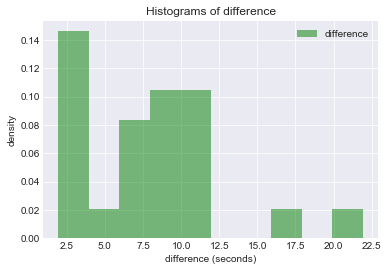

In [5]:
# view distribution of d
df['d'].hist(color='green',alpha=0.5,bins=10,  density=True,label='difference')
plt.legend()
plt.title('Histograms of difference')
plt.xlabel('difference (seconds)')
plt.ylabel('density');

### Proposed statistical test
These factors are taken into consideration when deciding what statistical test should be performed:
<br>
(1) Data are continuous.
<br>
(2) Sample is collected from randomly selected participants.
<br>
(3) Sample size is smaller than 30.

Due to small sample size, it is really hard to tell whether normal distribution assumption holds, so I will not take normality into consideration.
<br>
**A t-test is appropriate. Type I error is set to 0.001**

## (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. 

In [6]:
df['Congruent'].describe()

count    24.000000
mean     14.051125
std       3.559358
min       8.630000
25%      11.895250
50%      14.356500
75%      16.200750
max      22.328000
Name: Congruent, dtype: float64

In [7]:
df['Incongruent'].describe()

count    24.000000
mean     22.015917
std       4.797057
min      15.687000
25%      18.716750
50%      21.017500
75%      24.051500
max      35.255000
Name: Incongruent, dtype: float64

In [8]:
df['d'].describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: d, dtype: float64

#### From the results above, I got the following statistics:
Congruent: (1) Central tendency:         mean=14.05;  median=14.36;   (2) measure of variability:   range=13.7;  IQR=4.3;       std=3.56;   variance=12.57

Incongruent: (1) Central tendency:         mean=22.02;  median=21.02; (2) measure of variability:   range=19.57;  IQR=5.33;       std=4.80;   variance=23.01
             
d: (1) Central tendency:         mean=7.96;  median=7.66; (2) measure of variability:   range=13.70;  IQR=6.61;       std=4.86;   variance=23.62

## (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

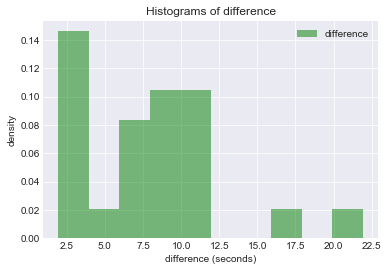

In [9]:
# view distribution of the d
df['d'].hist(color='green',alpha=0.5,bins=10,  density=True,label='difference')
plt.legend()
plt.title('Histograms of difference')
plt.xlabel('difference (seconds)')
plt.ylabel('density');

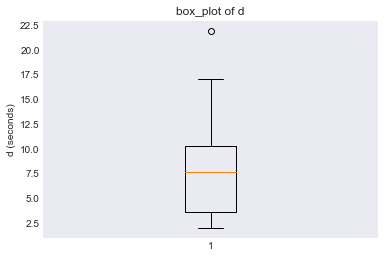

In [18]:
# view box-plot of d
plt.boxplot(df['d'])
plt.title('box_plot of d')
plt.ylabel('d (seconds)');

**Observations:**
<br>
** (1)** All values of difference are larger than 0!
<br>
** (2)** Sample d seem to be centered at 7.5. Because of limited sample size (n=24), it is hard to tell whether sample distribution is normal. 
<br>
** (3)** On Question(3), I found the mean and median of d within 6.2% std of each other. This indicates that sample distribution is close to normal
<br>
** (4)** There are 2 seemingly outliers at d = 17.0 and 21.9. These are not extreme outliers. Due to small sample size, I cannot rule these as outliers, so I will include them in my following analysis and test.

## (5)  Now, perform the statistical test and report your results.
What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

**Confidence level=99.9%, Type I error =0.001**

### T-test and results

### (1) manual t-test

In [11]:
#mean difference of the sample
mean_d=df['d'].mean()
mean_d

7.964791666666667

In [12]:
#sample size n
n=df.shape[0]
n

24

In [13]:
#standard deviation
std_d=df['d'].std()
std_d

4.864826910359056

In [14]:
#standard error
se_d=df['d'].std()/n**0.5
se_d

0.9930286347783406

In [15]:
#T-statistics
t_statistics=mean_d/se_d
t_statistics

8.020706944109957

**(1)** Looking up t in the t-distribution table, I found p<0.0005 (degree of freedom = 23), which is smaller than Type I error.  Assuming null hypothesis is correct, the probability to observe the test statistics 8.02 is less than 0.05%
<br>
**(2)** With Type I error=0.001, critical t-value =3.485, which is less than the calculated t-statistics.
<br>
**With above two comparison results, I reject the null hypothesis, and conclude that incongruent color recognition does take longer than congruent color recognition.**

### (2) t-test with Scipy.stats
The above performed t-test can also be done with Scipy.stats.

In [16]:
stats.ttest_1samp(df['d'],0)

Ttest_1sampResult(statistic=8.020706944109957, pvalue=4.103000585711178e-08)

#### Alternatively, a two-sample paired t-test yields same results.

In [17]:
stats.ttest_rel(df['Incongruent'], df['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.103000585711178e-08)

**(1)** These are two-tailed tests. The pvalue of one-tailed test= 0.5 * 4.1030005857111781e-08, which is less than Type I error. Assuming null hypothesis is correct, the probability to observe the test statistics 8.02 is 2.05e-08, meaning extremely unlikely.
<br>
**(2)** t-value is the same as before, and it is larger than critical t-value =3.485.
<br>
**With above two comparison results, I reject the null hypothesis, and conclude that incongruent color recognition does take longer than congruent color recognition.**

#### The results are consistent with my expectation.

## (6) Optional: 
What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think the Stroop effect is due to the facts that (1) participants were more trained at reading words than recognizing colors; (2) participants process words and colors through 2 distinct mechanisms. Because we are better at reading words, when we have to choose recognizing colors over reading the words, there is an interference between two potential responses, which causes a delay in recognizing the color. 

During googling, I found Simon effect. The participant is placed in front of a monitor and a panel with a left and a right button. The participant is told to press the right button when something red appears on the monitor, and press the left button when something green appears on the monitor. The red/green thing can appear anywhere in the monitor. When red appears on right side or green appears on left side of the monitor, the participant reacts quickly and presses the correct button. When red appears on left side of the monitor, or when green appears on the left side of the monitor, it takes longer time for the participant to figure out which button to press. 

Cause of Simon effect: Processing of location-location correspondence by our brain is more straight forward and faster than color-location translation. When red appears on right or green appears on left, their location corresponds well with the location of the buttons, and the participants simple presses the button that is on the same side as the color. In other cases, our brains have to process the color information and translate into location information. Color and location are two completely different category, therefore there are two distinct steps involved, and that is why in these cases the participants takes longer time to figure out the correct button. 

### References:
https://en.wikipedia.org

https://docs.python.org

https://d2l.deakin.edu.au/d2l/eP/presentations/presentation_preview_popup.d2l?presId=67655